# Problem
$\blacktriangleright$ Here we couple the incompressible NS equation with an advection-diffusion equation for the temperature field. Here advection of the temperature scalar field comes from the velocity field computed from the NS equation. The problem we want to simulate is a free temperature driven fluid convection among rigid solid walls with a cylindric obstacle.  
1. The problem in strong fomulation is
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t} -\nu\Delta u + (u\cdot \nabla)u + \nabla p + \beta g (T-T_{ref})=0 &\qquad in \thinspace \Omega\times (0,t_f)\\
        \text{div}u=0 &\qquad in \thinspace \Omega\times (0,t_f)\\
        \frac{\partial T}{\partial t}-k\Delta T +u\cdot \nabla T=0 &\qquad in \thinspace \Omega \times (0,t_f)\\
        u=0 &\qquad on \thinspace \Omega,t=0\\
        u=0 &\qquad in \thinspace \Gamma_{walls}\cup \Gamma_{5}\\
        T=0 &\qquad on \thinspace \Omega,t=0\\
        T=30 &\qquad in \thinspace \Gamma_{5}\\
        T=0 &\qquad in \thinspace \Gamma_{Bottom}
    \end{cases}
\end{equation}

2. We use here the _Incremental Chorin-Theman_ splitting procedure instead of solving the full non-linear problem, significantly reducing the computational time. Here the advection term is treated using the _Fixed Point_ method </br>
$\bullet$ step 1
\begin{equation}
    \begin{cases}
        \frac{\tilde{u}-u^n}{\Delta t}-\nu\Delta \tilde{u} + (u^n\cdot\nabla)\tilde{u}=-\nabla p^{n}-\beta g (T^{n}-T_{ref})\\
        \tilde{u}=0
    \end{cases}
\end{equation}
$\bullet$ step 2
\begin{equation}
    \begin{cases}
        -\Delta \delta p =-\frac{1}{\Delta t}\text{div}\tilde{u}\\
        \nabla \delta p \cdot n=0
    \end{cases}
\end{equation}
$\bullet$ step 3
\begin{equation}
    \begin{cases}
    u^{n+1}=\tilde{u}-\Delta t\nabla \delta p\\
    p^{n+1}=p^n +\delta p
\end{cases}
\end{equation}
$\bullet$ step 4
\begin{equation}
        \frac{T^{n+1}-T^n}{\Delta t} -k\Delta T^{n+1} +u^{n+1}\cdot \nabla T^{n+1}=0
\end{equation}

3. Functional Spaces adopted for this problem</br>
For the velocity field, test and trial functions
$$V_0=[H_0^1(\Omega)]^2 $$
$$V_D=\{v\in [H^1(\Omega)]^2 : v\vert_{\partial\Omega}=0\}$$
For the pressure field
$$Q\in H^1_0(\Omega)$$
For the Temperature field, test and trial functions
$$Z_0=[H_{\Gamma_5 \cup \Gamma_{bottom}}^1(\Omega)]^2$$
$$Z=\{w\in [H^1(\Omega)]^2: w\vert_{\Gamma_5}=30, \thinspace w\vert_{\Gamma_{Bottom}}=0\}$$

4. The weak formulation of the problem is </br>
$\blacktriangleright$ step 1
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega}\tilde{u}vd\Omega +\nu\int_{\Omega}\nabla \tilde{u}:\nabla vd\Omega +\int_{\Omega}(u^n\cdot\nabla)\tilde{u}vd\Omega=-\int_{\Omega}\nabla p^n vd\Omega \\-\int_{\Omega}\beta g (T^n-T_{ref})vd\Omega +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega
\end{align}
$\blacktriangleright$ step 2
\begin{align}
    \int_{\Omega}\nabla \delta p:\nabla q d\Omega = -\frac{1}{\Delta t}\int_{\Omega}\text{div}\tilde{u}qd\Omega
\end{align}
$\blacktriangleright$ step 3
\begin{align}
    \int_{\Omega}u^{n+1}vd\Omega=\int_{\Omega}\tilde{u}vd\Omega -\Delta t\int_{\Omega}\nabla\delta p v d\Omega
\end{align}
$\blacktriangleright$ step 4
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega} T^{n+1}wd\Omega +\int_{\Omega}k\nabla T^{n+1}:\nabla w d\Omega +\int_{\Omega}u^{n+1}\cdot \nabla T^{n+1}d\Omega=\frac{1}{\Delta t}\int_{\Omega}T^nwd\Omega
\end{align}

5. Direct algorithms for solution </br>
The algorithm used for the solution of the four linear systems is the _LU factorization_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

---

Setup environment and output path

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

In [ ]:
# Get current path: all relative paths that you may use for input/output start from here.
#
# - Colab:  The default path is /content, and your GDrive folder is accessible (if mounted) at /content/drive/MyDrive
#
# - local:  If running on your local machine, current_path is the position WHERE YOU LAUNCHED THE NOTEBOOK KERNEL BY 'jupyter notebook'
#           and NOT the directory in which this ipynb file is saved.
#           If you want to modify your current path, go to the terminal, stop the kernel (ctrl-C + press y), then move to the desired path by
#           cd my/desired/path/starting/from/here
#           and then launch 'jupyter notebook'.
import os
current_path = os.getcwd()
print(current_path)

basename = '...'
outfileU = File("/content/drive/MyDrive/velocity.pvd")
outfileP = File("/content/drive/MyDrive/pressure.pvd")
outfileT = File("/content/drive/MyDrive/temperature.pvd")


/content


/usr/local/lib/python3.11/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


---
---
# Exercise

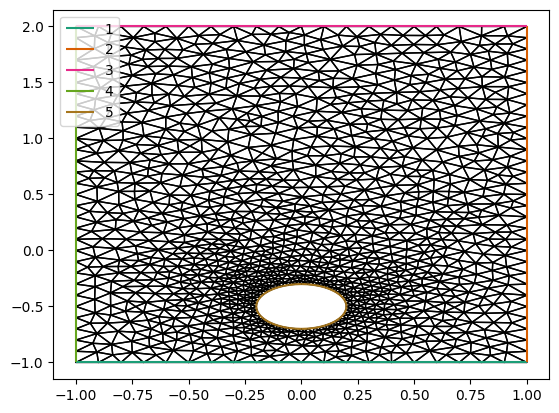

In [ ]:
# Import mesh: set the path correctly!
mesh = Mesh('/content/drive/MyDrive/meshes/cyl240109.msh')
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

### FE spaces, data, BCs

In [ ]:
# Function spaces
V = VectorFunctionSpace(mesh, 'P',2)
Q = FunctionSpace(mesh, 'P',1)
Z = FunctionSpace(mesh, 'P',1)


# Data
nu = 0.01
k = 0.01
alpha = 0.001
g = Constant((0,-9.8))
Tref = 0
t = 0
T = 100
dt = 1
x = SpatialCoordinate(mesh)
T_bottom=Constant(0)
T_cyl=Constant(30)
u_freeslip=Constant(0)
u_noslip=Constant((0,0))
f=Constant((0,0))
# Dirichlet boundary conditions - velocity


bc_noslip=DirichletBC(V, u_noslip,(5,2,4,3,1))
bcsU = (bc_noslip)

# Dirichlet boundary conditions - temperature
bc_T_bot=DirichletBC(Z,T_bottom,1)
bc_T_cyl=DirichletBC(Z,T_cyl,5)
bcsT = (bc_T_bot,bc_T_cyl)

#pressure
#bcsP=DirichletBC(Q,Constant(0),3)
nullsp = VectorSpaceBasis(constant=True)

firedrake:WARNING No comm specified for VectorSpaceBasis, COMM_WORLD assumed


### Initial condition

In [ ]:
# Functions on separated space, for C-T scheme
uh_old = Function(V)
ph_old = Function(Q)
th_old = Function(Z)


### Post-processing

In [ ]:
# vtk output for Paraview
uh_old.rename("Velocity")   # this names will be used in Paraview
ph_old.rename("Pressure")
th_old.rename("Temperature")
outfileU.write(uh_old)
outfileP.write(ph_old)
outfileT.write(th_old)

# Compute mean temperature, given a temperature field th
def mean_temperature(th):
    return 1/30*assemble(th*dx)

### Variational forms for incremental Chorin-Temam steps and thermal problem

In the inputs:<br>
*u, dp, t* are trial functions,<br>
*v, q, w* are corresponding test functions,<br>
*dt* is the time step length $\Delta t$,<br>
the suffix *..._old* denotes variables evaluated at the **previous time step**,<br>
the suffix *..._tilde* denotes variables computed at a **previous sub-step**, but associated to the **current time-step**.<br>


In [ ]:
# Forms for step 1 (incremental Chorin-Temam)
def predictor_forms(u, v, nu, alpha, g, Tref, dt, u_old, p_old, t_old):
    a = 1/dt*inner(u,v)*dx\
        +nu*inner(grad(u),grad(v))*dx\
        +inner(dot(grad(u),u_old),v)*dx\

    L = +1/dt*inner(u_old,v)*dx\
        -inner(grad(p_old),v)*dx\
        -alpha*dot(g,v)*(t_old-Tref)*dx


    return a, L

# Forms for step 2 (incremental Chorin-Temam)
def pressure_forms(dp, q, dt, u_tilde):
    a = inner(grad(dp),grad(q))*dx

    L = -1/dt*inner(div(u_tilde),q)*dx
    return a, L

# Forms for step 3 (incremental Chorin-Temam)
def projection_forms(u, v, u_tilde, dp, dt):
    a= dot(u,v)*dx
    L= dot(u_tilde,v)*dx\
       -dt*inner(grad(dp),v)*dx
    return a, L

# Forms for temperature equation
def temperature_forms(t, w, k, uh, t_old, dt):
    a = 1/dt*dot(t,w)*dx\
        +k*inner(grad(t),grad(w))*dx\
        + dot(uh, grad(t)) * w * dx
    L = dot(t_old,w)*dx #inner(Constant(0),w)*dx #dot(t_old,w)*dx

    return a, L

### Definition of the steps of the solver

In [ ]:
# For variational problems
u = TrialFunction(V)
v = TestFunction(V)
dp = TrialFunction(Q)   # incremental
q = TestFunction(Q)
t = TrialFunction(Z)
w = TestFunction(Z)

# Actual solution
uh = Function(V)
dph = Function(Q)       # incremental
th = Function(Z)

uh.interpolate(u_noslip) #Inizializzazione
th.interpolate(T_bottom)
dph.interpolate(Constant(0))
uh_old.assign(uh)
th_old.assign(th)
ph_old.assign(dph)

# Chorin-Temam step 1
a1,L1=predictor_forms(u,v,nu,alpha,g,Tref,dt,uh_old,ph_old,th_old)
step1_pb = LinearVariationalProblem( a1,L1,uh,bcs=bcsU )
step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 2
a2,L2=pressure_forms(dp,q,dt,uh)
step2_pb = LinearVariationalProblem( a2,L2,dph)
step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'}, nullspace=nullsp)

# Chorin-Temam step 3
a3,L3=projection_forms(u,v,uh,dph,dt)
step3_pb = LinearVariationalProblem( a3,L3,uh )
step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Step 4: temperature problem
a4,L4=temperature_forms(t,w,k,uh,th_old,dt)
temp_pb = LinearVariationalProblem( a4,L4,th,bcs=bcsT )
temp = LinearVariationalSolver(temp_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})


### Time-dependent solution

In [ ]:
t_vec = np.arange(0, T+0.1*dt, dt)  # T+0.1*dt to include also T: range/arange exclude the upper bound of the range
meantemp = [0.0] * len(t_vec)
meantemp[0] = mean_temperature(th_old)
for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t_val = t_vec[ii]
    print('Time = ', t_val)
    print('||u||_{H^1} =', norm(uh_old,'H1'), '  ||p||_{L^2} =', norm(ph_old,'L2'),'  ||t||_{L^2} =', norm(th_old,'L2')) # to check the solution is not blowing up


    step1.solve()
    step2.solve()
    step3.solve()

    a1,L1=predictor_forms(u,v,nu,alpha,g,Tref,dt,uh_old,ph_old,th_old)
    step1_pb = LinearVariationalProblem( a1,L1,uh,bcs=bcsU )
    step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})
    step1.solve()

    a2,L2=pressure_forms(dp,q,dt,uh)
    step2_pb = LinearVariationalProblem( a2,L2,dph)
    step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'}, nullspace=nullsp)
    step2.solve()

    a3,L3=projection_forms(u,v,uh,dph,dt)
    step3_pb = LinearVariationalProblem( a3,L3,uh )
    step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})
    step3.solve()

    a4,L4=temperature_forms(t,w,k,uh,th_old,dt)
    temp_pb = LinearVariationalProblem( a4,L4,th,bcs=bcsT )
    temp = LinearVariationalSolver(temp_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})
    temp.solve()

    meantemp[ii] = mean_temperature(th)

    uh.rename("Velocity")
    dph.rename("Pressure")
    th.rename("Temperature")
    outfileU.write(uh)
    outfileP.write(dph)
    outfileT.write(th)

    uh_old.assign(uh)
    ph_old.assign(dph)
    th_old.assign(th)

    # Post-processing
    outfileU.write(uh_old, time=t_val)
    outfileP.write(ph_old, time=t_val)
    outfileT.write(th_old, time=t_val)

Time =  1.0
||u||_{H^1} = 0.0   ||p||_{L^2} = 0.0   ||t||_{L^2} = 0.0
Time =  2.0
||u||_{H^1} = 0.0   ||p||_{L^2} = 0.0   ||t||_{L^2} = 7.63696667694207
Time =  3.0
||u||_{H^1} = 0.27745163732372496   ||p||_{L^2} = 0.01009741787900856   ||t||_{L^2} = 9.69702857550498
Time =  4.0
||u||_{H^1} = 0.36998357733067117   ||p||_{L^2} = 0.010265906764092054   ||t||_{L^2} = 10.951054649261911
Time =  5.0
||u||_{H^1} = 0.48452384278037675   ||p||_{L^2} = 0.01682564682828474   ||t||_{L^2} = 11.869167683404246
Time =  6.0
||u||_{H^1} = 0.5569642034703474   ||p||_{L^2} = 0.018643887600416575   ||t||_{L^2} = 12.614091955009798
Time =  7.0
||u||_{H^1} = 0.6324119228741747   ||p||_{L^2} = 0.023930702305520236   ||t||_{L^2} = 13.258874820844342
Time =  8.0
||u||_{H^1} = 0.691034520744482   ||p||_{L^2} = 0.02661758076906765   ||t||_{L^2} = 13.84225640397692
Time =  9.0
||u||_{H^1} = 0.749880366254629   ||p||_{L^2} = 0.03137407044122226   ||t||_{L^2} = 14.38287747806337
Time =  10.0
||u||_{H^1} = 0.802709

Final value: 3.2290433438499258


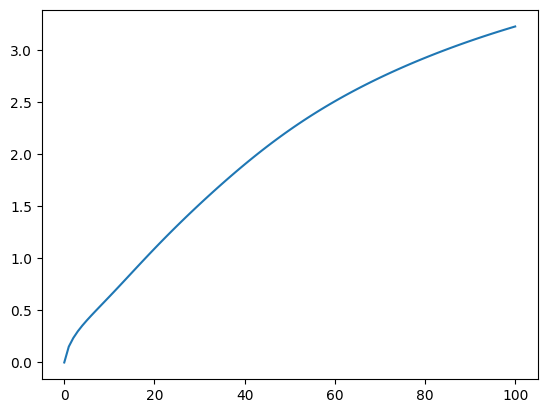

In [ ]:
fig, ax1 = plt.subplots()
line = ax1.plot(t_vec, meantemp)
print('Final value:', meantemp[-1])

Text(0.5, 1.0, 'temperature')

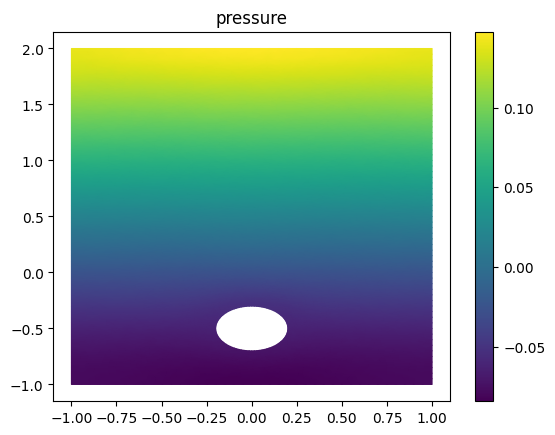

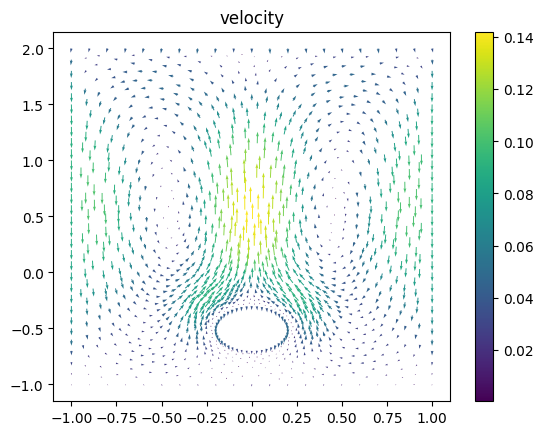

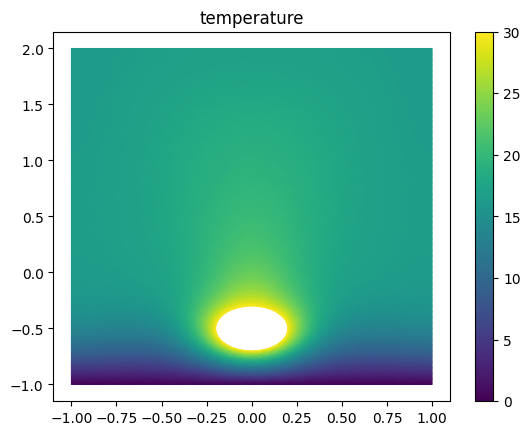

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(dph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')
fig, ax = plt.subplots()
col = tripcolor(th, axes=ax)
plt.colorbar(col)
plt.title('temperature')